### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [3]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")

# Print the first five rows
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [4]:
print("Shape: ",data.shape)
data.info()

Shape:  (398, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se 

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,...,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,...,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,...,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,...,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063532,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,...,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,...,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [6]:
# Print the number of unique values in each column
print("Number of unique values in each column:")
for column in data.columns:
  print(f"{column}: {data[column].nunique()}")

# Print the number of null values in each column
print("\nNumber of null values in each column:")
print(data.isnull().sum())

Number of unique values in each column:
id: 398
radius_mean: 343
texture_mean: 352
perimeter_mean: 369
area_mean: 383
smoothness_mean: 345
compactness_mean: 381
concavity_mean: 374
concave points_mean: 384
symmetry_mean: 326
fractal_dimension_mean: 366
radius_se: 388
texture_se: 372
perimeter_se: 385
area_se: 379
smoothness_se: 385
compactness_se: 382
concavity_se: 371
concave points_se: 362
symmetry_se: 367
fractal_dimension_se: 384
radius_worst: 330
texture_worst: 371
perimeter_worst: 370
area_worst: 390
smoothness_worst: 307
compactness_worst: 379
concavity_worst: 380
concave points_worst: 348
symmetry_worst: 365
fractal_dimension_worst: 379
diagnosis: 2

Number of null values in each column:
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fract

In [7]:
data = pd.get_dummies(data, columns=['diagnosis'])
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_B',
       'diagnosis_M'],
      dtype='object')

In [8]:
labels = data['diagnosis_M'].to_numpy()
data = data.drop(columns=['diagnosis_B', 'diagnosis_M'])
print(data.shape)
print(labels.shape)

(398, 31)
(398,)


In [9]:
#seeing the distribution of class labels
pd.Series(labels).value_counts()

False    250
True     148
Name: count, dtype: int64

In [10]:
'''
import matplotlib.pyplot as plt
from IPython.display import Image
# Plot pairplot
sns_plot = sns.pairplot(data, hue='diagnosis', height=2.0)
sns_plot.savefig("pairplot.png")
plt.clf() # Clean parirplot figure from sns
Image(filename='pairplot.png') # Show pairplot as image
'''

'\nimport matplotlib.pyplot as plt\nfrom IPython.display import Image\n# Plot pairplot\nsns_plot = sns.pairplot(data, hue=\'diagnosis\', height=2.0)\nsns_plot.savefig("pairplot.png")\nplt.clf() # Clean parirplot figure from sns\nImage(filename=\'pairplot.png\') # Show pairplot as image\n'

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head()

(318, 31) (80, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
64,911366,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,...,13.36,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.1416,0.2660,0.09270
55,88649001,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050
317,9113455,13.14,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.1181,0.2563,0.08174
102,8712729,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.1474,0.2810,0.07228
358,88119002,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,...,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

## Evaluate the model using Accuracy Score

In [13]:
accuracy_score(y_test, y_pred)

0.95

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [14]:
# creating an explainer for our model
explainer = shap.TreeExplainer(model)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)[:,:,1]

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value[1])

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.34427672955974853


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.016993,-0.009588,0.035468,0.006216,-0.012607,0.001917,-0.001245,0.058226,0.038802,0.000960,...,-0.028862,0.014695,0.123742,-0.010051,0.017357,0.048560,0.054354,0.063133,0.004100,0.005090
1,-0.001638,-0.025673,-0.004445,-0.017607,-0.017943,-0.000673,-0.001596,-0.017239,-0.018246,-0.000424,...,-0.069662,-0.005247,-0.049842,-0.042162,-0.001195,-0.002889,-0.016109,-0.018210,-0.002788,-0.002946
2,0.003100,-0.024311,0.001391,-0.017809,-0.017466,-0.003977,-0.005352,-0.011812,-0.012980,-0.000584,...,0.202030,0.013438,0.144365,0.119213,0.005669,0.001494,0.013925,-0.013653,-0.002355,-0.001374
3,0.003068,-0.026222,-0.022181,-0.019035,-0.016415,-0.001455,-0.002120,-0.014278,-0.018508,-0.000709,...,-0.067140,-0.011322,-0.044522,-0.038034,-0.006665,-0.002782,-0.014724,-0.019471,-0.003448,-0.002584
4,-0.001991,-0.024217,-0.006946,-0.017466,-0.018344,-0.001449,-0.001807,-0.018700,-0.018997,-0.000035,...,-0.060593,-0.006557,-0.042297,-0.037102,-0.008553,-0.006163,-0.011790,-0.017600,-0.002442,-0.003106


## Write your inferences from the generated plot.

This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).
Also, the Expected Value: 0.34427672955974853 being displayed above will be used as the base value throughout all the visualizations below. The values above this base value will be put into class 1 (tumor is malignant) wheras the values below it will be put into class 0 (tumor is benign).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [15]:
y_test[0]
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[0,:], X_test.iloc[0,:])

## Write your inferences from the generated plot.

SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting the tumor as malignant.
The explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the actual model output.
Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.
We can see all but one of the features are displayed in red i.e they contributed to the tumor being classified as malignant by pushing it up from the base value. radius_worst is in blue, i.e. it contributed to reducing the value.
The final value(displayed in bold) is much higher than the base value. Thus, the tumor is classified as malignant.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[:80,:], X_test.iloc[:1000,:])

## Write your inferences from the generated plot.

Most of the earlier samples are inclined to be diagnosed as malignant due to the lower values of radius_worst and area_worst. The later samples are more inclined to be diagnosed as malignant due to these two attributes having higher values (area>1000)

# Task 6

## Plot a SHAP summary plot using all the features in the data

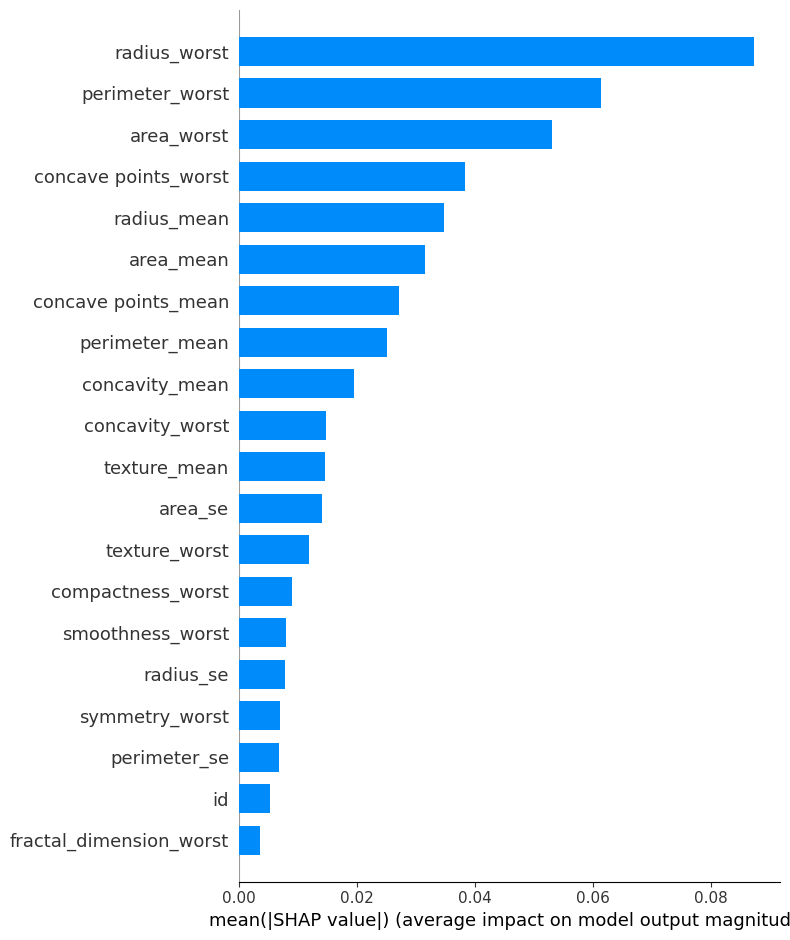

In [17]:
shap.initjs()
shap.summary_plot(shap_values,
                  X_test, plot_type="bar")

## Write your inferences from the generated plot.

radius_worst and area_worst of the tumor are the two most influential features in diagnosing the tumor. Symmetry, fractal dimension, and smoothness are among the least influential.

# Task 7

##Plot a SHAP dependecne plot using all features in the data

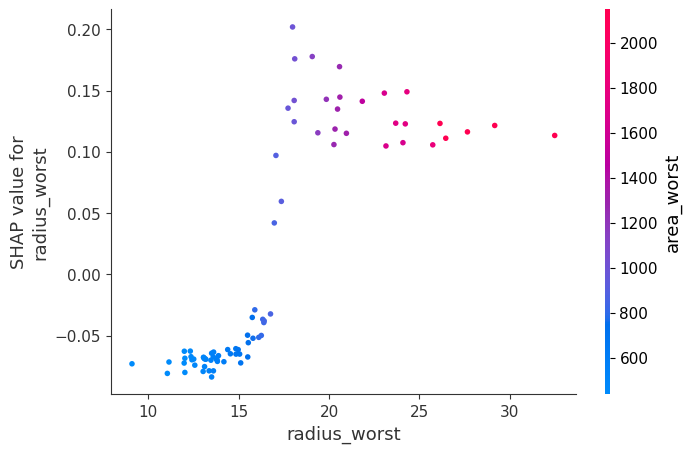

In [20]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='area_worst',
                     shap_values=shap_values,
                     features=X_test)

## Write your inferences from the generated plot.

Tumor is likely to be malignant if the radius_worst is between 15 and 20 cm while area_worst is between 1000 and 1200

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them.

Who knows, this section might carry some bonus points.